In [1]:
import glob
import numpy as np
from typing import Dict, List
from ephysvibe.structures.neuron_data import NeuronData
from ephysvibe.structures.population_data import PopulationData
from ephysvibe.dataviz import plot_raster
import pandas as pd
from joblib import Parallel, delayed
from tqdm import tqdm
from ephysvibe.stats import smetrics
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import os
import _pipeline

In [2]:
path="/envau/work/invibe/USERS/IBOS/data/Riesling/TSCM/OpenEphys/population/in_out_b1_b2/2025_01_03_12_05_07/pfc/population.h5"

In [3]:
popu = PopulationData.from_python_hdf5(path)

In [4]:
start_sample = 0
end_sample = 300

In [5]:
st_target = 0
end_target = 150
cerotr, percentile=True,True
st_bl = -150
end_bl = 0

In [6]:
allres=[]
for i,neu in enumerate(popu.population[125:300]):
    res = _pipeline.get_space_neutral_roc(
        neu,
        start_sample,
        end_sample,
        st_target,
        end_target,
        st_bl,
        end_bl,
        cerotr=cerotr,
        percentile=percentile,
    )
    allres.append(res)

KeyboardInterrupt: 

In [ ]:
i

27

In [20]:
path='/envau/work/invibe/USERS/IBOS/data/Riesling/TSCM/OpenEphys/neutral_space_idx/2025_01_08_10_14_32/pfc'
df = pd.read_csv(f'{path}/neutral_space_idx.csv')
df['neutral_idx'] = df['neutral_in']-df['neutral_out']
df['spatial_idx'] = df['space_in']-df['space_out']
df

,Unnamed: 0,nid,neutral_in,neutral_latin,neutral_out,neutral_latout,space_in,space_latin,space_out,space_latout,neutral_idx,spatial_idx
0,0,2022-12-01_10-23-18_Riesling_pfc_e1_r1_mua1,NaN,NaN,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
1,1,2022-12-01_10-23-18_Riesling_pfc_e1_r1_mua2,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
2,2,2022-12-01_10-23-18_Riesling_pfc_e1_r1_good2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2022-11-22_10-59-03_Riesling_pfc_e1_r1_mua14,0.000000,NaN,0.000000,NaN,0.433594,120.0,0.000000,NaN,0.000000,0.433594
4,4,2023-03-09_10-35-09_Riesling_pfc_e1_r1_mua24,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
2117,2117,2023-03-09_10-35-09_Riesling_pfc_e1_r1_mua21,0.232388,174.0,0.068537,174.0,0.000000,NaN,0.000000,NaN,0.163850,0.000000
2118,2118,2023-03-09_10-35-09_Riesling_pfc_e1_r1_good11,0.305471,181.0,0.241968,190.0,0.000000,NaN,0.000000,NaN,0.063503,0.000000
2119,2119,2023-03-09_10-35-09_Riesling_pfc_e1_r1_mua22,0.000000,NaN,-0.151441,238.0,0.000000,NaN,0.333333,147.0,0.151441,-0.333333
2120,2120,2023-03-09_10-35-09_Riesling_pfc_e1_r1_good12,0.000000,NaN,0.275992,288.0,0.000000,NaN,0.000000,NaN,-0.275992,0.000000


(-1.0, 1.0)

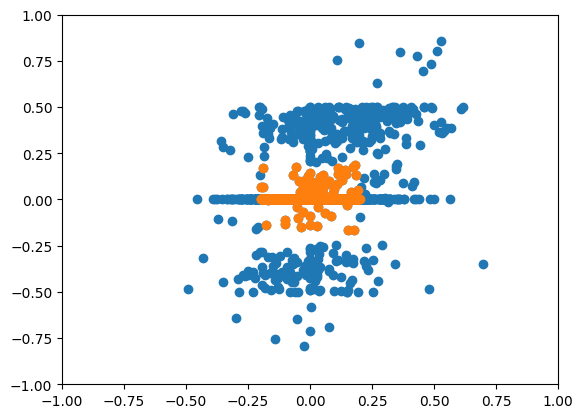

In [21]:
plt.scatter(df['neutral_idx'],df['spatial_idx'])
df_zero = df[np.logical_and(abs(df['neutral_idx'])<0.2,abs(df['spatial_idx'])<0.2)]
plt.scatter(df_zero['neutral_idx'],df_zero['spatial_idx'])
plt.xlim([-1,1])
plt.ylim([-1,1])

In [23]:
df_nonan = df[np.logical_and(~np.isnan(df['neutral_idx']),~np.isnan(df['spatial_idx']))]
len(df_nonan)

1347

470

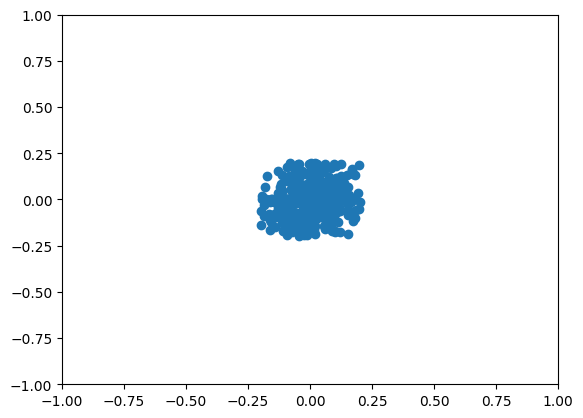

In [16]:
df_zero = df_zero[np.logical_and(~np.isnan(df_zero['neutral_idx']),~np.isnan(df_zero['spatial_idx']))]
plt.scatter(df_zero['neutral_idx'],df_zero['spatial_idx'])
plt.xlim([-1,1])
plt.ylim([-1,1])
len(df_zero)

In [ ]:
listdf = df_zero[np.logical_and(abs(df_zero['neutral_idx'])>0.05,abs(df_zero['spatial_idx'])>0.05)]
listdf = listdf['nid'].values
len(listdf)

131

In [ ]:
path1 = f'{path}/less_than_0.2/b1'
path2 = f'{path}/less_than_0.2/b2'
if not os.path.exists(path1):
    os.makedirs(path1)
if not os.path.exists(path2):
    os.makedirs(path2)

for nid in df_zero['nid'].values:#[np.arange(0,892,11)]:
    path_n=f'/envau/work/invibe/USERS/IBOS/data/Riesling/TSCM/OpenEphys/new_structure/session_struct/pfc/neurons/{nid}_neu.h5'
    neu_n = NeuronData.from_python_hdf5(path_n)
    sp, conv = plot_raster.prepare_data_plotb1(neu_n,rf_stim_loc= ["contra", "ipsi"],cerotr=True,percentile=True)
    fig1=plot_raster.plot_sp_b1(neu_n,sp, conv)
    fig1.savefig(path1+'/'+nid+'.jpg',format='jpg')
    sp_pos, conv_pos, max_n_tr, conv_max = plot_raster.prepare_data_plotb2(neu_n)
    fig2 = plot_raster.plot_sp_b2(neu_n,sp_pos, conv_pos, max_n_tr, conv_max, visual_rf=True,inout=1,bl_st=100, bl_end=200, tg_st=250, tg_end=350)
    fig2.savefig(path2+'/'+nid+'.jpg',format='jpg')
    plt.close('all')

In [32]:
nid = df_nonan['nid'].values[2]# '2022-11-22_10-59-03_Riesling_pfc_e1_r1_mua15' # listdf[6]

In [33]:
df[df['nid']==nid]

,Unnamed: 0,nid,neutral_in,neutral_latin,neutral_out,neutral_latout,space_in,space_latin,space_out,space_latout,neutral_idx,spatial_idx
5,5,2023-03-09_10-35-09_Riesling_pfc_e1_r1_good13,0.220378,261.0,0.184165,270.0,0.0,NaN,0.0,NaN,0.036212,0.0


In [34]:
path=f'/envau/work/invibe/USERS/IBOS/data/Riesling/TSCM/OpenEphys/new_structure/session_struct/pfc/neurons/{nid}_neu.h5'
neu_n = NeuronData.from_python_hdf5(path)

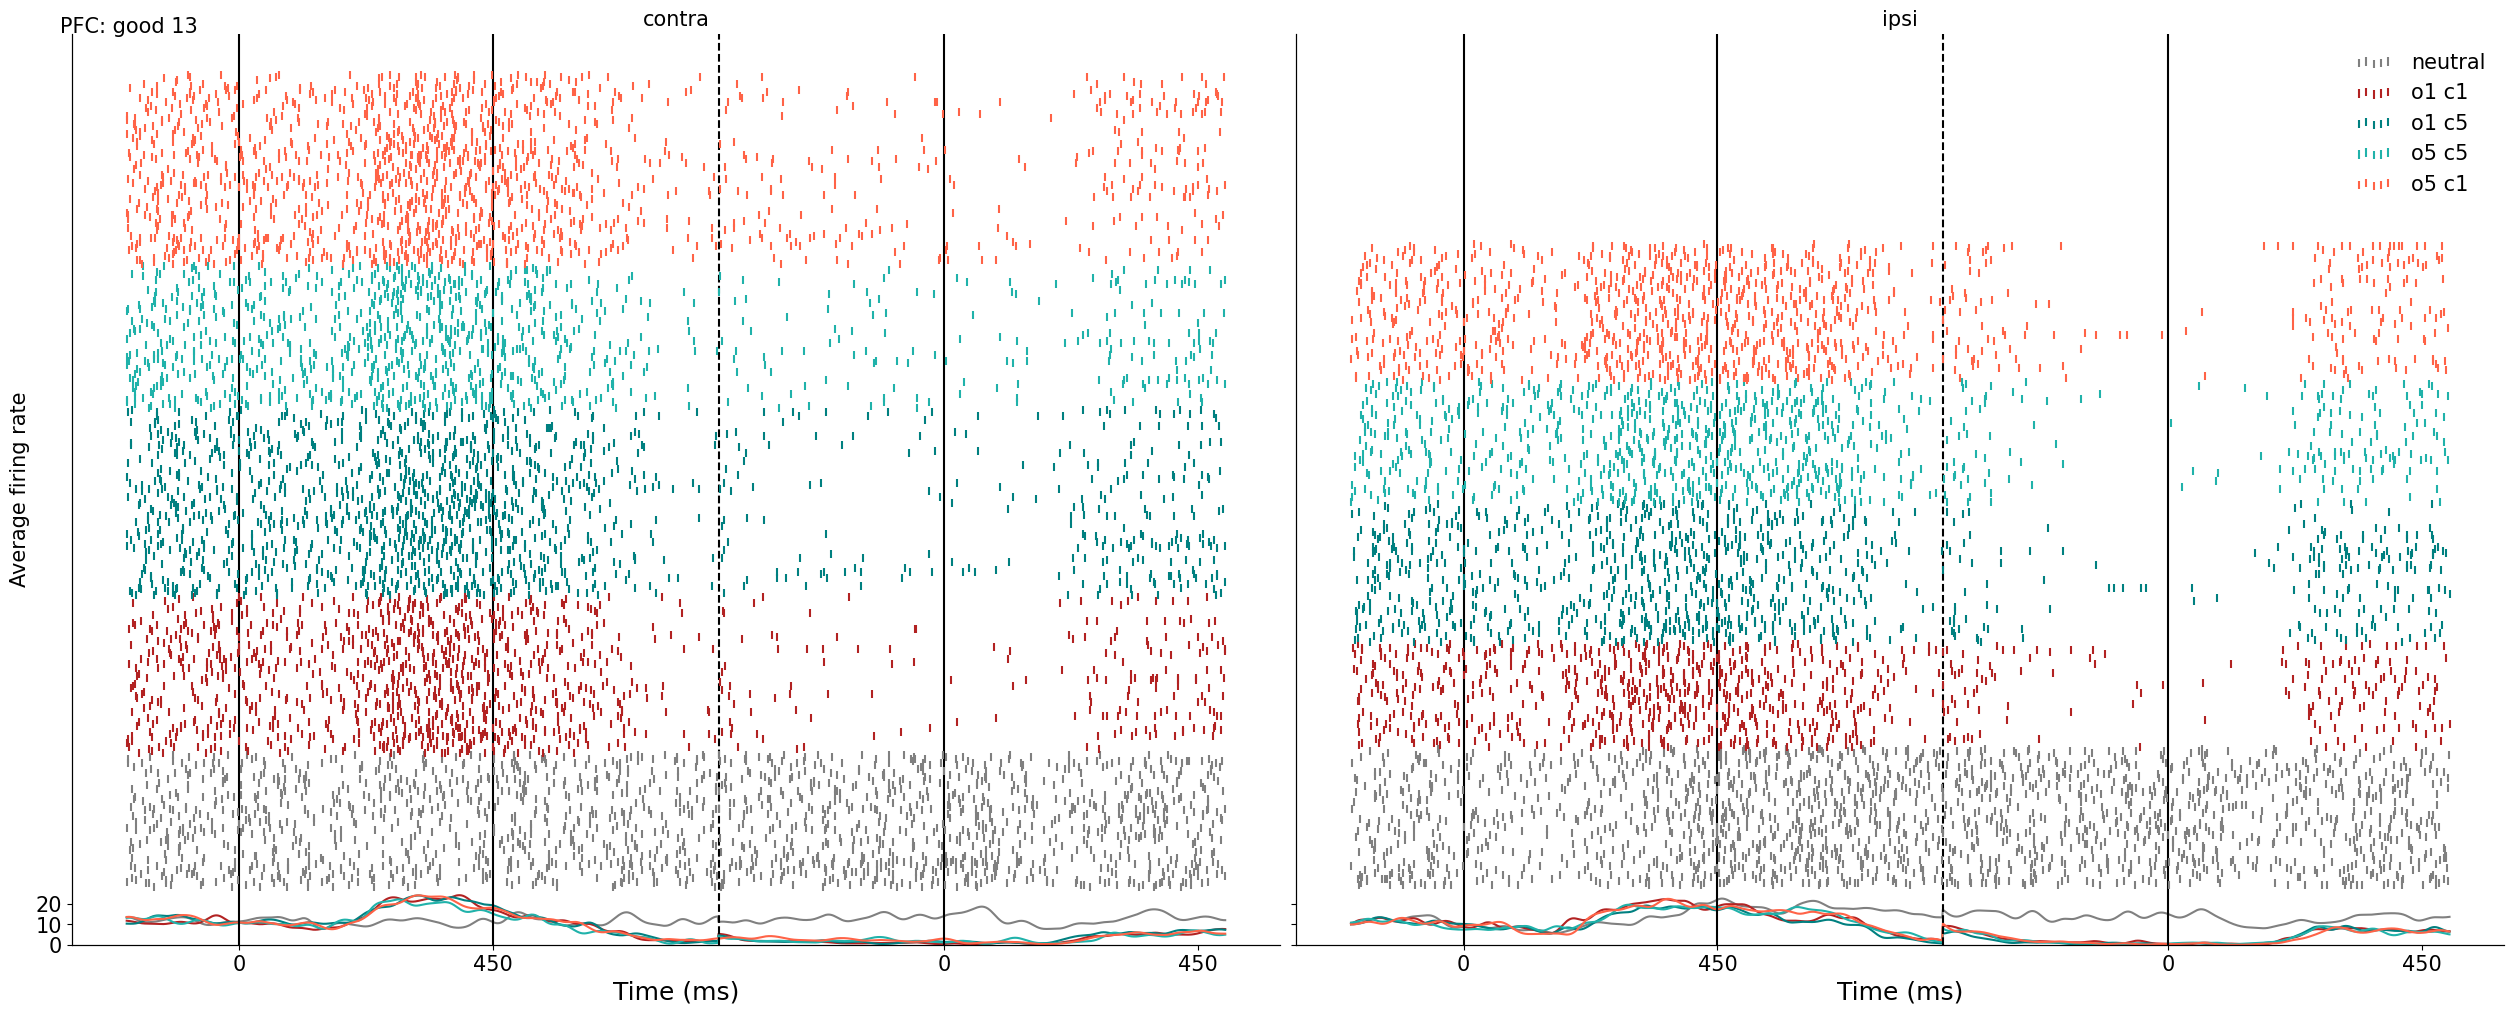

In [35]:
sp, conv = plot_raster.prepare_data_plotb1(neu_n,rf_stim_loc= ["contra", "ipsi"],cerotr=True,percentile=True)
fig=plot_raster.plot_sp_b1(neu_n,sp, conv)

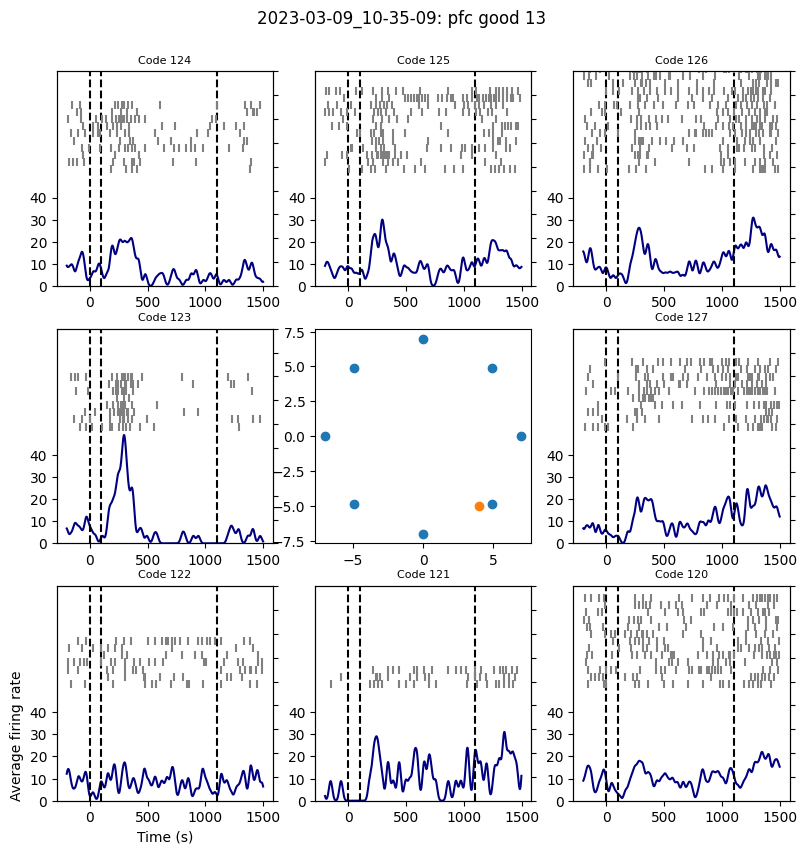

In [36]:
sp_pos, conv_pos, max_n_tr, conv_max = plot_raster.prepare_data_plotb2(neu_n)
fig = plot_raster.plot_sp_b2(neu_n,sp_pos, conv_pos, max_n_tr, conv_max, visual_rf=True,inout=1,bl_st=100, bl_end=200, tg_st=250, tg_end=350)